# Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz


In [2]:
### Read the file

data_df = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/mergedcustomers_missing_values_GENDER.csv")

In [3]:
data_df.isna()

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2063,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2064,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data_df.count()

ID                           2066
CHURNRISK                    2066
GENDER                       2063
STATUS                       2066
CHILDREN                     2066
ESTINCOME                    2066
HOMEOWNER                    2066
AGE                          2066
TOTALDOLLARVALUETRADED       2066
TOTALUNITSTRADED             2066
LARGESTSINGLETRANSACTION     2066
SMALLESTSINGLETRANSACTION    2066
PERCENTCHANGECALCULATION     2066
DAYSSINCELASTLOGIN           2066
DAYSSINCELASTTRADE           2066
NETREALIZEDGAINS_YTD         2066
NETREALIZEDLOSSES_YTD        2066
dtype: int64

In [5]:
condition = data_df["GENDER"].isna()
data_df_cleaned = data_df[~condition]

# Linear Regression

In [6]:
homeval_df = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/predict_home_value.csv")
print(f"Size: {len(homeval_df)}\n{homeval_df.dtypes}")
homeval_df.sample(5)

Size: 1460
ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object


,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
263,264,5500,1Fam,1.5Fin,7,1929,Gable,TA,BrkTil,TA,...,Detchd,Unf,2,TA,0,NaN,NaN,4,2010,130000
132,133,7388,1Fam,1Story,6,1959,Gable,TA,CBlock,TA,...,Detchd,Unf,2,TA,0,NaN,NaN,7,2007,150750
456,457,4571,1Fam,2Story,5,1916,Gable,TA,BrkTil,TA,...,Detchd,Unf,3,Fa,0,NaN,NaN,5,2008,98000
231,232,15138,1Fam,2Story,5,1995,Gable,TA,PConc,TA,...,Attchd,Fin,3,TA,0,NaN,NaN,7,2009,403000
1288,1289,5664,TwnhsE,1Story,5,2000,Gable,TA,PConc,TA,...,Attchd,Fin,2,TA,0,NaN,NaN,10,2009,278000


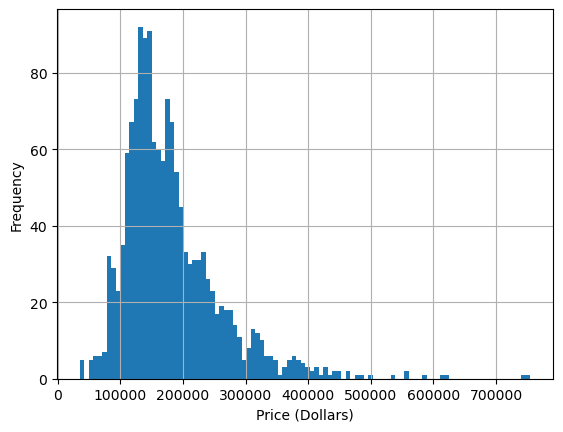

In [7]:
plt.hist(homeval_df["SALEPRICE"], bins=100)
plt.ylabel("Frequency")
plt.xlabel("Price (Dollars)")
plt.grid()

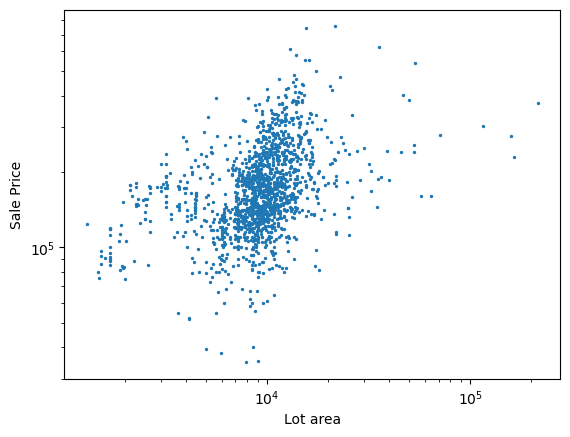

In [8]:
plt.scatter(homeval_df["LOTAREA"], homeval_df["SALEPRICE"],s = 2)
plt.xlabel("Lot area")
plt.ylabel("Sale Price")

plt.xscale('log')
plt.yscale('log')

In [9]:
complete_columns = ~homeval_df.isna().any()
complete_cols_index = homeval_df.columns[complete_columns]
homeval_df_clean = homeval_df.loc[:,complete_cols_index]

In [10]:
regression = linear_model.LinearRegression()
regression.fit(homeval_df_clean["YEARBUILT"].values.reshape(-1,1), homeval_df_clean["SALEPRICE"].values.reshape(-1,1))

LinearRegression()

In [11]:
print(regression.coef_)
print(regression.intercept_)

[[1375.37346794]]
[-2530308.24573236]


In [12]:
years = np.round(np.linspace(homeval_df["YEARBUILT"].min(), homeval_df["YEARBUILT"].max(),40))
prediction = regression.predict(years.reshape(-1,1))

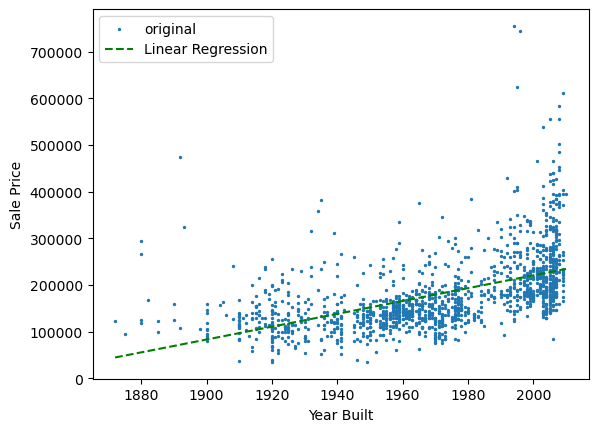

In [13]:
plt.scatter(homeval_df_clean["YEARBUILT"], homeval_df_clean["SALEPRICE"], s = 2, label = "original")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")

plt.plot(years.reshape(-1,1), prediction, color='g', ls='--', label = "Linear Regression")
plt.legend()

In [14]:
regression.score(homeval_df["YEARBUILT"].values.reshape(-1,1), homeval_df["SALEPRICE"].values.reshape(-1,1)) ## This is wrong

0.27342162073249154

# Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

homeval_df_clean = homeval_df_clean.sort_values(by = "YEARBUILT", ascending = True)

polynomial_features= PolynomialFeatures(degree=2)

year = homeval_df_clean["YEARBUILT"].values.reshape(-1,1)
sale_price = homeval_df_clean["SALEPRICE"].values.reshape(-1,1)

year_new = polynomial_features.fit_transform(year)

In [16]:
poly_model = linear_model.LinearRegression().fit(year_new, sale_price)
print(poly_model.coef_)
print(poly_model.intercept_)
print(poly_model.score(year_new,sale_price))

[[ 0.00000000e+00 -8.47261672e+04  2.19421059e+01]]
[81914126.55757745]
0.34842307932638417


In [17]:
sale_pred = poly_model.predict(year_new)

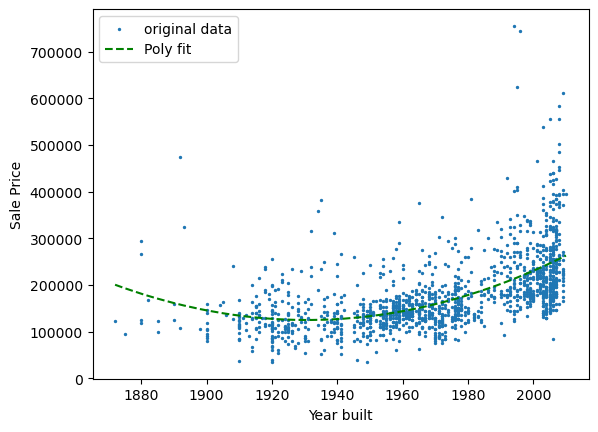

In [18]:
plt.scatter(homeval_df["YEARBUILT"], homeval_df["SALEPRICE"],s = 2, label = "original data")
plt.xlabel("Year built")
plt.ylabel("Sale Price")

plt.plot(year, sale_pred, color = "g", ls = '--', label = "Poly fit")
plt.legend()

# Creating Training and Testing Data Sets using SciKit

In [19]:
year = homeval_df_clean["YEARBUILT"].values.reshape(-1,1)
sale_price = homeval_df_clean["SALEPRICE"].values.reshape(-1,1)

year_train, year_test, sale_train, sale_test = train_test_split(year, sale_price, train_size=0.8)
print("DataSet Training Dimensions: Input features"+str(year_train.shape) + " Output label"+str(sale_train.shape))
print("DataSet Testing Dimensions: Input features"+str(year_test.shape) + " Output label"+str(sale_test.shape))


DataSet Training Dimensions: Input features(1168, 1) Output label(1168, 1)
DataSet Testing Dimensions: Input features(292, 1) Output label(292, 1)


In [20]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(year_train, sale_train)
sale_pred = linear_reg.predict(year_test)

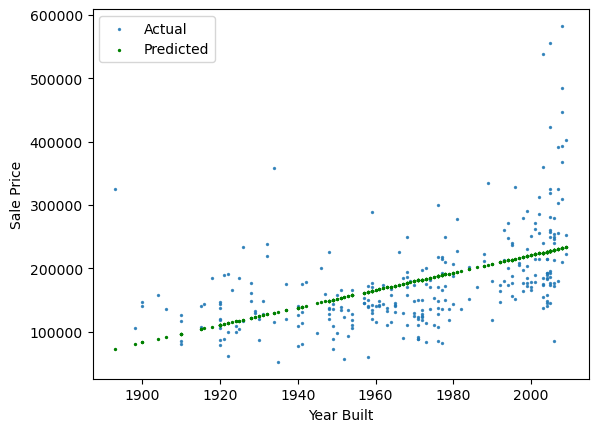

In [21]:
plt.scatter(year_test,sale_test, s = 2, label = "Actual", alpha = 0.8)
plt.xlabel("Year Built")
plt.ylabel("Sale Price")

plt.scatter(year_test,sale_pred, color = 'g', s=2, label = "Predicted")
plt.legend()

In [22]:
print("Mean Squared Error: %.2f"%(mean_squared_error(sale_test,sale_pred)))
print("Coefficient of Determination: %.2f"%(r2_score(sale_test,sale_pred)))

Mean Squared Error: 4751708817.21
Coefficient of Determination: 0.26


# Get All Numerical Values

In [23]:
numerical_vals = homeval_df_clean.select_dtypes(include =[float, int])

In [24]:
numerical_vals.columns #we want to remove useless data, i.e. 'ID' and also the dependent variable 'SALEPRICE'

Index(['ID', 'LOTAREA', 'OVERALLCOND', 'YEARBUILT', 'FULLBATH', 'HALFBATH',
       'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES',
       'GARAGECARS', 'POOLAREA', 'MOSOLD', 'YRSOLD', 'SALEPRICE'],
      dtype='object')

In [25]:
numerical_vals = numerical_vals.loc[:, numerical_vals.columns[1:-1]]

# Decision Tree based on numerical values

In [26]:
num_cols = numerical_vals.columns
scaler_num = StandardScaler()
numerical_transformer = Pipeline(steps=[('scale',scaler_num)])
preprocessorForNum = ColumnTransformer(transformers = [('num', numerical_transformer, num_cols)])
#numerical_vals_scaled = preprocessorForNum.fit_transform(numerical_vals)

In [27]:
X_train, X_test, sale_train, sale_test = train_test_split(numerical_vals, sale_price, train_size = 0.8)

decision_tree = DecisionTreeRegressor()
dtr_model = Pipeline([('preprocessor_num',preprocessorForNum),('decisiontree',decision_tree)])
dtr_model.fit(X_train, sale_train)

Pipeline(steps=[('preprocessor_num',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['LOTAREA', 'OVERALLCOND', 'YEARBUILT', 'FULLBATH', 'HALFBATH',
       'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES',
       'GARAGECARS', 'POOLAREA', 'MOSOLD', 'YRSOLD'],
      dtype='object'))])),
                ('decisiontree', DecisionTreeRegressor())])

In [28]:
sale_pred_dtr = dtr_model.predict(X_test)

In [29]:
"""
export_graphviz(decision_tree, out_file ='tree.dot')  
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
from IPython.display import Image
Image('tree.png')
"""

"\nexport_graphviz(decision_tree, out_file ='tree.dot')  \n# Use dot file to create a graph\n(graph, ) = pydot.graph_from_dot_file('tree.dot')\ngraph.write_png('tree.png')\nfrom IPython.display import Image\nImage('tree.png')\n"

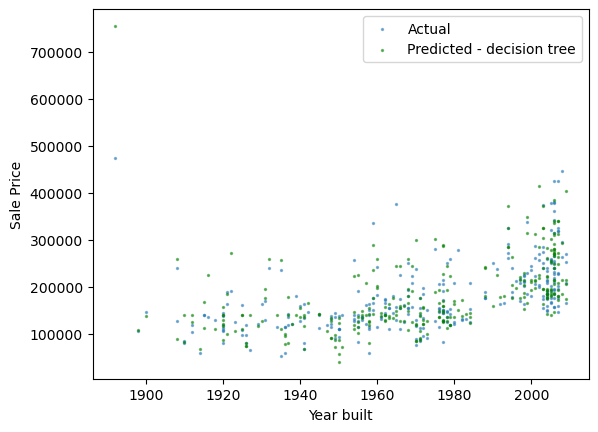

In [30]:
plt.scatter(X_test["YEARBUILT"], sale_test, s = 2, label = "Actual", alpha = 0.5)
plt.xlabel("Year built")
plt.ylabel("Sale Price")

plt.scatter(X_test["YEARBUILT"], sale_pred_dtr, color = 'g', s =2,  label = "Predicted - decision tree", alpha = 0.5)
plt.legend()

In [31]:
print("Mean Squared Error: %.2f"%(mean_squared_error(sale_test,sale_pred_dtr)))
print("Coefficient of Determination: %.2f"%(r2_score(sale_test,sale_pred_dtr)))

Mean Squared Error: 2296713221.63
Coefficient of Determination: 0.56


# Obtain Categorical Data

In [32]:
categoricals = homeval_df_clean.select_dtypes(include=[object]).columns
homeval_df_clean.loc[:,categoricals].apply(lambda x: x.unique())

BLDGTYPE                   [1Fam, 2fmCon, Duplex, Twnhs, TwnhsE]
HOUSESTYLE     [2Story, 1.5Fin, 2.5Fin, 1Story, 2.5Unf, 1.5Un...
ROOFSTYLE             [Gable, Mansard, Hip, Gambrel, Flat, Shed]
EXTERCOND                                   [Gd, TA, Ex, Fa, Po]
FOUNDATION            [BrkTil, CBlock, Stone, PConc, Slab, Wood]
HEATING                    [OthW, GasA, GasW, Grav, Wall, Floor]
HEATINGQC                                   [Fa, Gd, TA, Ex, Po]
CENTRALAIR                                                [N, Y]
KITCHENQUAL                                     [TA, Gd, Fa, Ex]
dtype: object